用sklearn中的svm算法对 moon数据进行分类    
用 rbf kernel, 调节gamma, 可视化决策边界, 来感性的看一下gamma的大小，对分类结果的影响。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

/home/crystal/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


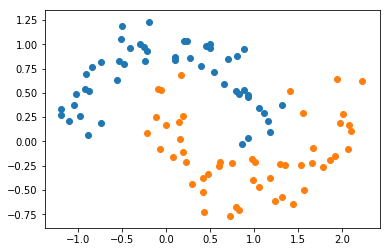

In [3]:
X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

将数据标准化并绘制出来

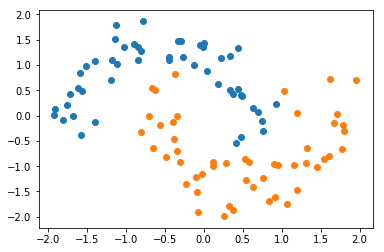

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
plt.scatter(X_std[y==0, 0], X_std[y==0, 1])
plt.scatter(X_std[y==1, 0], X_std[y==1, 1])
plt.show()

# 用sklearn中的SVM分类，用RBF kernel，调整gamma看其对分类结果的影响

In [6]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
def RBFKernelSVC(gamma = 1.0):
    return Pipeline([('std_scaler', StandardScaler()),
                     ('svc',SVC(kernel='rbf', gamma = gamma))
    ])
# SVC 中 kernel default is rbf

1. default gamma is 1.0

In [7]:
rbfSVC = RBFKernelSVC() # 默认的gamma = 1.0
rbfSVC.fit(X, y)


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

绘制决策边界

In [8]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[3], axis[2], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    ss = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, ss, linewidth=5, cmap=custom_cmap)

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


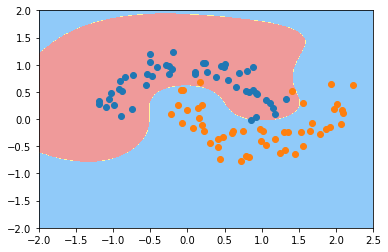

In [9]:
plot_decision_boundary(rbfSVC, axis=[-2.0, 2.5, -2.0, 2.0])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

2 令 gamma = 100

In [11]:
rbfSVC_gamma100 = RBFKernelSVC(gamma = 100) # 默认的gamma = 1.0
rbfSVC_gamma100.fit(X, y)


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


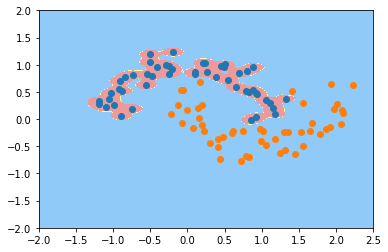

In [13]:
plot_decision_boundary(rbfSVC_gamma100, axis = [-2.0, 2.5, -2.0, 2.0])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

上图显然是过拟合了，每个蓝色小圆点附近有一个钟形图，蓝色小圆点就是最高峰。    
 gamma越大， 方差越小，高斯分布的钟形越窄，即分布越集中。    
 gamma越小， 方差越大，高斯分布的钟形越宽，即分布越分散, 最后看起来就成了一个片状，如gamma=1 的图示

3 gamma = 10

In [15]:
rbfSVC_gamma10 = RBFKernelSVC(gamma = 10)
rbfSVC_gamma10.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


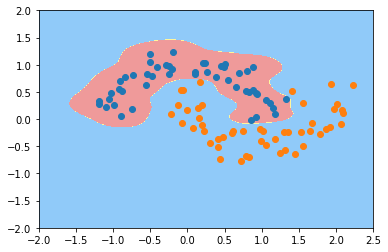

In [16]:
plot_decision_boundary(rbfSVC_gamma10, axis = [-2, 2.5, -2, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

这样是不是比gamma = 100 好一点呢

4 gamma = 0.5

In [17]:
rbfSVC_gamma05 = RBFKernelSVC(gamma = 0.5)
rbfSVC_gamma05.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


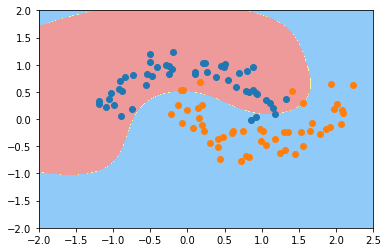

In [18]:
plot_decision_boundary(rbfSVC_gamma05, axis = [-2, 2.5, -2, 2])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

5 令 gamma = 0.1

In [19]:
rbfSVC_gamma01 = RBFKernelSVC(gamma = 0.1)
rbfSVC_gamma01.fit(X, y)


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


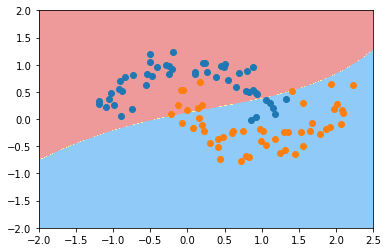

In [20]:
plot_decision_boundary(rbfSVC_gamma01, axis = [-2, 2.5, -2, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

这样类似于线性分类，又欠拟合了， 决策边界不能很好的将两类分开

conclusion:     
gamma 过大 容易过拟合，模型太过复杂；    
gamma 过小 容易欠拟合，模型太过简单；